In [9]:
%matplotlib inline
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

Fourier Transform manipulation
=====
Let's study noisy sinusoidal waves
\begin{equation}
\nonumber
f[t] =  \sin\left(\frac{2\pi}{T}t\right) + \varepsilon_t
\end{equation}
with $\varepsilon_t = \mathcal{N}(0,\sigma^2)$ i.i.d.

Text(0.5,1,u'Original Signal')

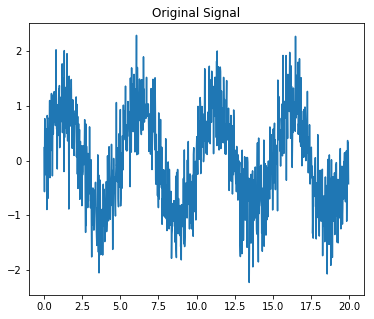

In [10]:
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)
# sig = np.sin(2 * np.pi / period * time_vec) + np.sin(2 * np.pi / (0.1*period) * time_vec) + \
#         0.5 * np.random.randn(time_vec.size)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.title('Original Signal')

Switch to the frequency space
===

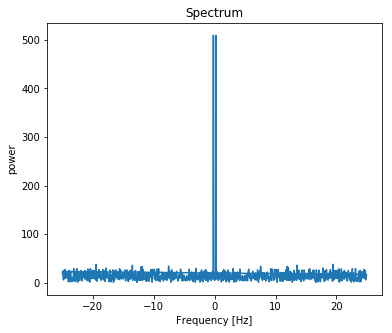

In [11]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.title('Spectrum')
plt.show()

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

Filter the signal
===

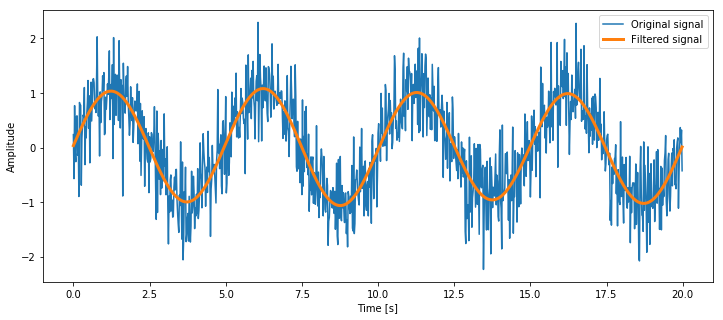

In [12]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(12, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

### Power spectrum of the original and the filtered signal

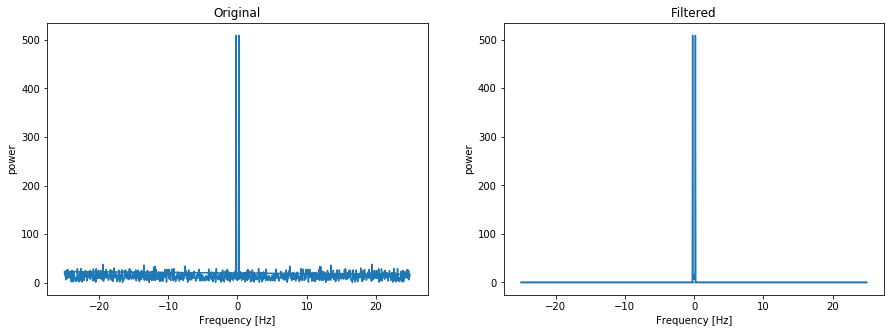

In [13]:
# The FFT of the signal
sig_fft_filtered = fftpack.fft(filtered_sig)

# And the power (sig_fft is of complex dtype)
power_filtered = np.abs(sig_fft_filtered)

# The corresponding frequencies
sample_freq_filtered = fftpack.fftfreq(filtered_sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.title('Original')

plt.subplot(122)
plt.plot(sample_freq_filtered, power_filtered)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.title('Filtered')


plt.show()
